# Modeling step

# Import tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import sparse

from sklearn import decomposition
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

# Import data

In [2]:
game_ratings = pd.read_csv(
    "/content/drive/MyDrive/Springboard DS/data/cleaned_game_ratings.csv",
    index_col=0)

bigram_count_mtx = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/bigram_count_mtx.npz")
bigram_count_mtx_test = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/bigram_count_mtx_test.npz")

trigram_count_mtx = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/trigram_count_mtx.npz")
trigram_count_mtx_test = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/trigram_count_mtx_test.npz")

bigram_freq_mtx = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/bigram_freq_mtx.npz")
bigram_freq_mtx_test = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/bigram_freq_mtx_test.npz")

trigram_freq_mtx = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/trigram_freq_mtx.npz")
trigram_freq_mtx_test = sparse.load_npz(
    "/content/drive/MyDrive/Springboard DS/data/trigram_freq_mtx_test.npz")

bigram_columns = np.load(
    "/content/drive/MyDrive/Springboard DS/data/bigram_columns.npy",
    allow_pickle=True)

trigram_columns = np.load(
    "/content/drive/MyDrive/Springboard DS/data/trigram_columns.npy",
    allow_pickle=True)

y_train = pd.read_csv(
    "/content/drive/MyDrive/Springboard DS/data/y_train.csv", index_col=0)
y_test = pd.read_csv(
    "/content/drive/MyDrive/Springboard DS/data/y_test.csv", index_col=0)

# Distance measures

## Binary matrix

### Hamming distance

In [ ]:
hamming_bigrams = pairwise_distances(bigram_count_mtx.toarray(), metric='hamming')
hamming_trigrams = pairwise_distances(trigram_count_mtx.toarray(), metric='hamming')

hamming_bigrams_test = pairwise_distances(X=bigram_count_mtx_test.toarray(), metric='hamming')
hamming_trigrams_test = pairwise_distances(X=trigram_count_mtx_test.toarray(), metric='hamming')

### Jaccard index

In [ ]:
jaccard_bigrams = pairwise_distances(X=bigram_count_mtx.toarray(), metric='jaccard')
jaccard_trigrams = pairwise_distances(X=trigram_count_mtx.toarray(), metric='jaccard')

jaccard_bigrams_test = pairwise_distances(X=bigram_count_mtx_test.toarray(), metric='jaccard')
jaccard_trigrams_test = pairwise_distances(X=trigram_count_mtx_test.toarray(), metric='jaccard')

## Continuous matrix

### Euclidean distance

In [ ]:
eucl_bigrams = pairwise_distances(X=bigram_freq_mtx, metric='euclidean')
eucl_trigrams = pairwise_distances(X=trigram_freq_mtx, metric='euclidean')

eucl_bigrams_test = pairwise_distances(
    X=bigram_freq_mtx_test, metric='euclidean')
eucl_trigrams_test = pairwise_distances(
    X=trigram_freq_mtx_test, metric='euclidean')

### Cosine similarity

In [ ]:
cosine_bigrams = pairwise_distances(X=bigram_freq_mtx, metric='cosine')
cosine_trigrams = pairwise_distances(X=trigram_freq_mtx, metric='cosine')

cosine_bigrams_test = pairwise_distances(X=bigram_freq_mtx_test, metric='cosine')
cosine_trigrams_test = pairwise_distances(X=trigram_freq_mtx_test, metric='cosine')

# Clustering: K-Means

## Calculate clusters using the elbow method for bigrams

Text(0.5, 1.0, 'Elbow curve for bigrams')

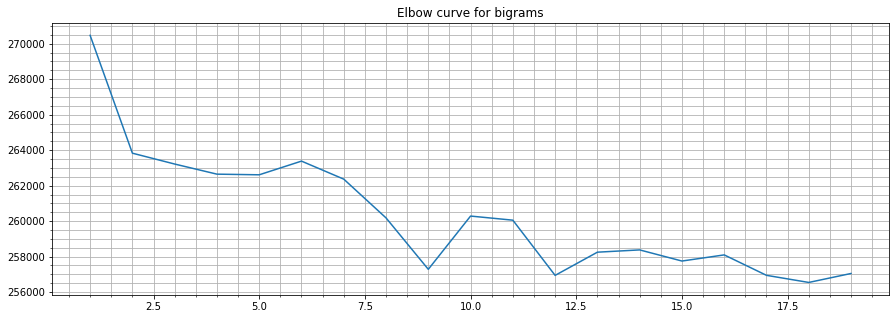

In [3]:
distortions = []
K = range(1,20)

for k in K:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(bigram_count_mtx)
    distortions.append(kmean_model.inertia_)

# Plot the elbow
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), distortions)
plt.grid(b=True, which='both')
plt.minorticks_on()
plt.title('Elbow curve for bigrams')

## Calculate cluster number for trigrams using elbow method

Text(0.5, 1.0, 'Elbow curve for trigrams')

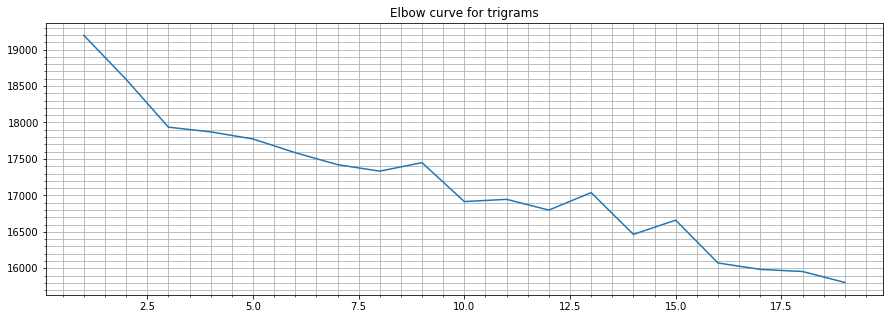

In [4]:
distortions = []
K = range(1,20)

for k in K:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(trigram_count_mtx)
    distortions.append(kmean_model.inertia_)

# Plot the elbow
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), distortions)
plt.grid(b=True, which='both')
plt.minorticks_on()
plt.title('Elbow curve for trigrams')

## Create variables for cluster counts

In [6]:
bigram_clusters = 6  # from elbow method above
trigram_clusters = 3 # from elbow method above

## Set up KMeans on count matrix

In [7]:
bigrams_count_kmeans = KMeans(n_clusters=bigram_clusters,
                              init='k-means++',
                              random_state=42)

trigrams_count_kmeans = KMeans(n_clusters=trigram_clusters,
                               init='k-means++',
                               random_state=42)

bigram_count_assn = bigrams_count_kmeans.fit_predict(bigram_count_mtx)
trigram_count_assn = trigrams_count_kmeans.fit_predict(trigram_count_mtx)

### Run PCA to reduce components

In [8]:
bigram_pca = decomposition.PCA(n_components=2)
bigram_pca_fitted = bigram_pca.fit(bigram_count_mtx.toarray())

bigram_pca_fitted.explained_variance_ratio_

array([0.02480294, 0.01155077])

In [9]:
bigram_pca_transformed = bigram_pca.transform(bigram_count_mtx.toarray())

bigram_pc1, bigram_pc2 = zip(*bigram_pca_transformed)

### Plot PCA components

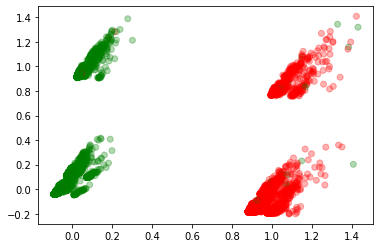

In [10]:
cmap = matplotlib.colors.ListedColormap(['red', 'green'])

plt.scatter(bigram_pc1, bigram_pc2, c=bigram_count_assn.tolist(), cmap=cmap, alpha=0.3)

### Create dataframe of bigrams cluster IDs and ratings

In [11]:
bigram_cluster_df = pd.DataFrame(
    {"cluster": bigrams_count_kmeans.predict(bigram_count_mtx),
     "rating": np.array(y_train['rating'])})

bigram_cluster_df.head(5)

,cluster,rating
0,4,4.0
1,4,8.0
2,4,8.0
3,4,3.5
4,4,7.0


### Plot bigram clusters against ratings

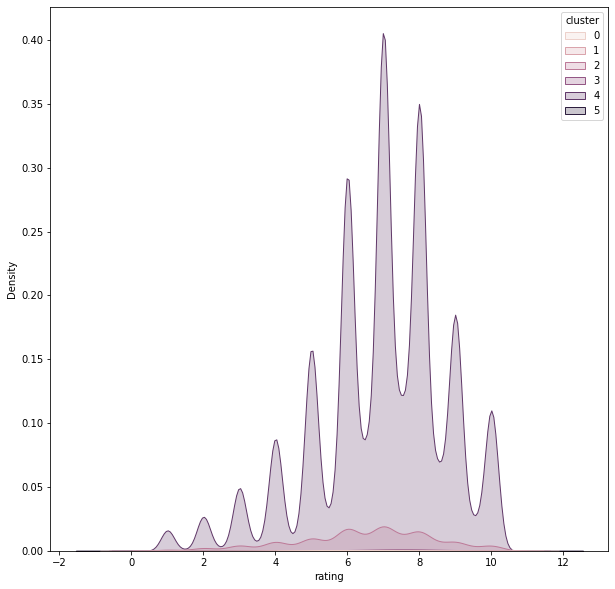

In [12]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data=bigram_cluster_df, x="rating", hue="cluster", shade=True)


### Create dataframe of trigram cluster IDs and ratings

In [13]:
trigram_cluster_df = pd.DataFrame(
    {"cluster": trigrams_count_kmeans.predict(trigram_count_mtx),
     "rating": np.array(y_train['rating'])})

### Plot trigram clusters against ratings

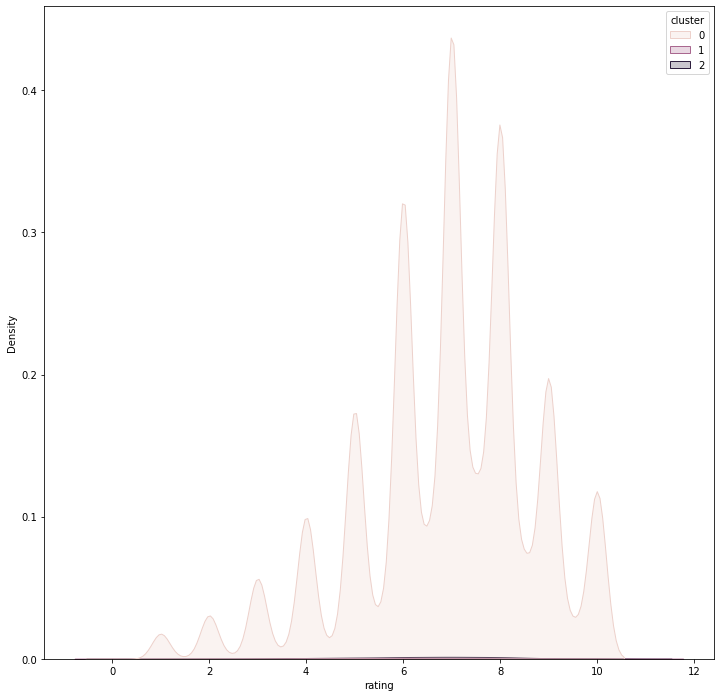

In [14]:
plt.figure(figsize=(12, 12))
sns.kdeplot(data=trigram_cluster_df, x="rating", hue="cluster", shade=True)

### Top terms per cluster

In [15]:
print("Top terms: bigrams")
bi_order_centroids = bigrams_count_kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(bigram_clusters):
    print("Cluster %d:" % i)
    for ind in bi_order_centroids[i, :10]:
        print(" %s" % bigram_columns[ind], end="\n")
    print()

print()
print("Top terms: trigrams")
tri_order_centroids = trigrams_count_kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(trigram_clusters):
    print("Cluster %d:" % i)
    for ind in tri_order_centroids[i, :10]:
        print(" %s" % trigram_columns[ind], end="\n")
    print()

Top terms: bigrams
Cluster 0:
 takes long
 long time
 don t
 doesn t
 isn t
 aren t
 time set
 m sure
 worker placement
 long s

Cluster 1:
 core set
 deck building
 x wing
 isn t
 m sure
 don t
 didn t
 doesn t
 hasn t
 expansions add

Cluster 2:
 don t
 t know
 t think
 doesn t
 didn t
 isn t
 t feel
 t mind
 t care
 won t

Cluster 3:
 boardgamegeek com
 com thread
 www boardgamegeek
 https boardgamegeek
 https www
 http www
 youtube com
 www youtube
 com watch
 watch v

Cluster 4:
 doesn t
 didn t
 isn t
 worker placement
 easy learn
 haven t
 area control
 easy teach
 wasn t
 player interaction

Cluster 5:
 hadn t
 don t
 didn t
 isn t
 doesn t
 wouldn t
 wasn t
 s pretty
 engine building
 t know


Top terms: trigrams
Cluster 0:
 don t know
 don t mind
 don t care
 doesn t feel
 doesn t work
 people don t
 looking forward playing
 https boardgamegeek com
 boardgamegeek com thread
 www boardgamegeek com

Cluster 1:
 don t feel
 time don t
 don t think
 rules easy teach
 doesn t feel

## Set up KMeans on frequency matrix

In [16]:
bigrams_freq_kmeans = KMeans(n_clusters=bigram_clusters,
                              init='k-means++',
                              random_state=42)

trigrams_freq_kmeans = KMeans(n_clusters=trigram_clusters,
                               init='k-means++',
                               random_state=42)

bigram_freq_assn = bigrams_freq_kmeans.fit_predict(bigram_freq_mtx)
trigram_freq_assn = trigrams_freq_kmeans.fit_predict(trigram_freq_mtx)

### Run PCA to reduce components

In [17]:
bigram_pca_freq = decomposition.PCA(n_components=2)
bigram_pca_freq_fitted = bigram_pca_freq.fit(bigram_freq_mtx.toarray())

bigram_pca_freq_fitted.explained_variance_ratio_

array([0.01030736, 0.00577597])

In [18]:
bigram_pca_freq_transformed = bigram_pca_freq.transform(bigram_freq_mtx.toarray())

bigram_freq_pc1, bigram_freq_pc2 = zip(*bigram_pca_freq_transformed)

### Plot top components

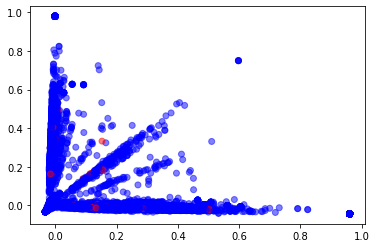

In [19]:
cmap = matplotlib.colors.ListedColormap(['red', 'blue'])

plt.scatter(bigram_freq_pc1, bigram_freq_pc2, c=bigram_freq_assn.tolist(), cmap=cmap, alpha=0.5)

### Create dataframe of bigrams cluster IDs and ratings

In [20]:
bigram_cluster_df_freq = pd.DataFrame(
    {"cluster": bigrams_freq_kmeans.predict(bigram_freq_mtx),
     "rating": np.array(y_train['rating'])})

bigram_cluster_df_freq.head(5)

,cluster,rating
0,4,4.0
1,4,8.0
2,4,8.0
3,4,3.5
4,1,7.0


### Plot bigram clusters against ratings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


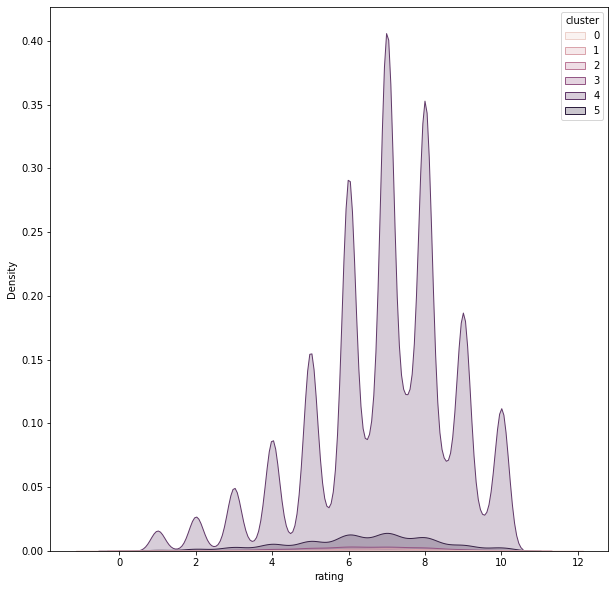

In [21]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data=bigram_cluster_df_freq, x="rating", hue="cluster", shade=True)

### Create dataframe of trigram cluster IDs and ratings

In [22]:
trigram_cluster_df_freq = pd.DataFrame(
    {"cluster": trigrams_freq_kmeans.predict(trigram_freq_mtx),
     "rating": np.array(y_train['rating'])})

### Plot trigram clusters against ratings

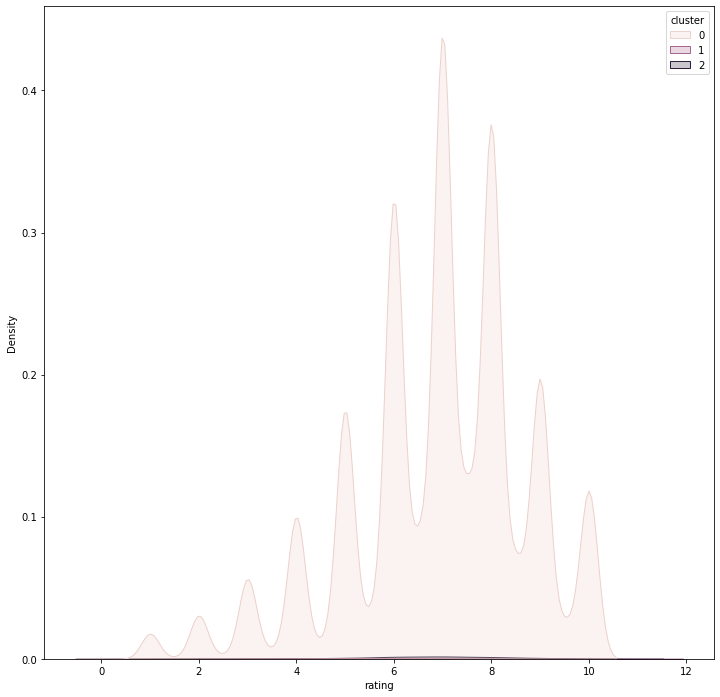

In [23]:
plt.figure(figsize=(12, 12))
sns.kdeplot(data=trigram_cluster_df_freq, x="rating", hue="cluster", shade=True)

### Top terms per cluster

In [24]:
print("Top terms: bigrams")
bi_freq_centroids = bigrams_freq_kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(bigram_clusters):
    print("Cluster %d:" % i)
    for ind in bi_freq_centroids[i, :10]:
        print(" %s" % bigram_columns[ind], end="\n")
    print()

print()
print("Top terms: trigrams")
tri_freq_centroids = trigrams_freq_kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(trigram_clusters):
    print("Cluster %d:" % i)
    for ind in tri_freq_centroids[i, :10]:
        print(" %s" % trigram_columns[ind], end="\n")
    print()

Top terms: bigrams
Cluster 0:
 super light
 light party
 light version
 light rules
 light filler
 s light
 party people
 great filler
 apples apples
 people s

Cluster 1:
 m sure
 sure s
 don t
 didn t
 sure ll
 doesn t
 sure d
 sure m
 sure better
 players m

Cluster 2:
 cards used
 way introduce
 sleeved cards
 s small
 quality cards
 card quality
 cards way
 great lots
 bit simple
 great way

Cluster 3:
 isn t
 don t
 t bad
 doesn t
 t great
 aren t
 t interesting
 t quite
 t lot
 theme isn

Cluster 4:
 doesn t
 didn t
 worker placement
 easy learn
 haven t
 area control
 wasn t
 easy teach
 push luck
 non gamers

Cluster 5:
 don t
 t know
 t think
 t care
 t mind
 doesn t
 t feel
 people don
 t enjoy
 didn t


Top terms: trigrams
Cluster 0:
 don t think
 don t care
 doesn t feel
 don t feel
 don t mind
 doesn t work
 looking forward playing
 people don t
 didn t feel
 haven t tried

Cluster 1:
 don t enjoy
 enjoy don t
 sure don t
 people don t
 s don t
 normally don t
 reason don

# Topic modeling

## NMF

### Instantiate model for count matrix

In [25]:
nmf_model_bigrams_count = NMF(
    n_components=10, init='nndsvdar', random_state=42, max_iter=100)

nmf_model_trigrams_count = NMF(
    n_components=10, init='nndsvdar', random_state=42, max_iter=100)

Fit training sets with NMF

In [26]:
nmf_topics_bigrams_count = nmf_model_bigrams_count.fit_transform(bigram_count_mtx)
nmf_topics_trigrams_count = nmf_model_trigrams_count.fit_transform(trigram_count_mtx)

Transform test sets with NMF

In [27]:
nmf_topics_bigrams_test_count = nmf_model_bigrams_count.transform(bigram_count_mtx_test)
nmf_topics_trigrams_test_count = nmf_model_trigrams_count.transform(trigram_count_mtx_test)

Output topic phrases

In [28]:
n_top_phrases = 10 

for topic_idx, topic in enumerate(nmf_model_bigrams_count.components_):
  print(f'Topic {(topic_idx + 1)}:')
  print(' '.join([bigram_columns[i] for i in topic.argsort()\
                  [:-n_top_phrases - 1:-1]]))

Topic 1:
don t t know t think t mind t care t feel people don t enjoy players don t understand
Topic 2:
doesn t t feel t work t make t matter t long t quite t help theme doesn t come
Topic 3:
didn t t feel t enjoy t work t think t care t know t grab t quite couldn t
Topic 4:
isn t t bad t great t lot t quite t interesting t s theme isn long time thing thing
Topic 5:
worker placement resource management great worker victory points solid worker placement resource engine building player interaction stone age set collection
Topic 6:
easy learn learn teach s easy quick easy learn hard learn quick hard master rules easy learn easy great easy
Topic 7:
haven t t tried long time t seen t years t long t gotten looking forward t able quite bit
Topic 8:
aren t won t area control m sure player interaction wouldn t deck building push luck set collection think s
Topic 9:
wasn t t bad wouldn t t sure couldn t t expecting t impressed t great initial rating year old
Topic 10:
easy teach s easy non gamer

### Instantiate model for frequency matrix

In [29]:
nmf_model_bigrams = NMF(
    n_components=10, init='nndsvdar', random_state=42, max_iter=100)

nmf_model_trigrams = NMF(
    n_components=10, init='nndsvdar', random_state=42, max_iter=100)

Fit training sets with NMF

In [30]:
nmf_topics_bigrams = nmf_model_bigrams.fit_transform(bigram_freq_mtx)
nmf_topics_trigrams = nmf_model_trigrams.fit_transform(trigram_freq_mtx)

Transform test sets with NMF

In [31]:
nmf_topics_bigrams_test = nmf_model_bigrams.transform(bigram_freq_mtx_test)
nmf_topics_trigrams_test = nmf_model_trigrams.transform(trigram_freq_mtx_test)

Output top bigram topic phrases



In [32]:
n_top_phrases = 10 

for topic_idx, topic in enumerate(nmf_model_bigrams.components_):
  print(f'Topic {(topic_idx + 1)}:')
  print(' '.join([bigram_columns[i] for i in topic.argsort()\
                  [:-n_top_phrases - 1:-1]]))

Topic 1:
don t t know t think t care t mind t feel t enjoy people don t understand players don
Topic 2:
didn t t enjoy t feel wasn t t work t care t think t grab t know t quite
Topic 3:
doesn t t work t feel t make t quite t long t matter theme doesn t help t come
Topic 4:
worker placement player interaction great worker solid worker resource management dice rolling engine building deck building placement resource placement theme
Topic 5:
isn t t bad aren t wasn t t great t interesting won t t quite t s wouldn t
Topic 6:
easy learn quick easy learn quick great easy learn teach learn hard fast easy s easy easy teach hard master
Topic 7:
haven t t tried t years long time t seen t long t quite year old wasn t t gotten
Topic 8:
area control set collection deck building interesting area hand management tile laying building area resource management dice rolling card drafting
Topic 9:
trick taking taking card player trick wasn t nice twist non gamers wouldn t s ok special cards looking forwar

Output top trigram top phrases

In [33]:
n_top_phrases = 10 

for topic_idx, topic in enumerate(nmf_model_trigrams.components_):
  print(f'Topic {(topic_idx + 1)}:')
  print(' '.join([trigram_columns[i] for i in topic.argsort()\
                  [:-n_top_phrases - 1:-1]]))

Topic 1:
don t know t know s t know people players don t know don t plays don t cards don t great don t love don t playing don t
Topic 2:
don t think t think s t think ll t think d t think ve players don t player don t cards don t time don t playing don t
Topic 3:
don t care players don t usually don t love don t things don t s don t doesn t matter didn t enjoy theme don t generally don t
Topic 4:
doesn t feel isn t quite multiple paths victory time doesn t higher player counts cards doesn t doesn t matter doesn t make s doesn t players doesn t
Topic 5:
don t feel time don t cards don t doesn t matter rules don t don t understand players don t doesn t make rules easy teach end don t
Topic 6:
don t mind t mind playing long don t s don t players don t wouldn t mind win don t isn t interesting personally don t cards don t
Topic 7:
doesn t work t work players players doesn t player doesn t theme doesn t didn t work doesn t matter isn t bad doesn t make don t try
Topic 8:
looking forward pl

## LDA

### Instantiate model for count matrix


In [34]:
lda_bigrams_count = LatentDirichletAllocation(
    n_components=5, random_state=42, learning_method="batch")
lda_trigrams_count = LatentDirichletAllocation(
    n_components=5, random_state=42, learning_method="batch")

Fit training sets with LDA

In [35]:
lda_topics_bigrams_count = lda_bigrams_count.fit_transform(bigram_count_mtx)
lda_topics_trigrams_count = lda_trigrams_count.fit_transform(trigram_count_mtx)

Transform test sets with LDA

In [36]:
lda_topics_bigrams_count_test = lda_bigrams_count.transform(bigram_count_mtx_test)
lda_topics_trigrams_count_test = lda_trigrams_count.transform(trigram_count_mtx_test)

Output top bigram topic phrases

In [38]:
n_top_phrases = 10 

for topic_idx, topic in enumerate(lda_bigrams_count.components_):
  print(f'Topic {(topic_idx + 1)}:')
  print(' '.join([bigram_columns[i] for i in topic.argsort()\
                  [:-n_top_phrases - 1:-1]]))

Topic 1:
didn t aren t deck building long time looking forward player interaction trick taking push luck doesn t m sure
Topic 2:
worker placement simple rules non gamers quite bit boardgamegeek com great theme decisions make s simple years ago s pretty
Topic 3:
don t easy learn doesn t easy teach didn t t know t think won t isn t wouldn t
Topic 4:
haven t area control little bit year old doesn t worker placement player counts paths victory look forward ve seen
Topic 5:
doesn t isn t wasn t set collection dice rolling best players rating based s great ticket ride wouldn t


Output top trigram topic phrases

In [39]:
for topic_idx, topic in enumerate(lda_trigrams_count.components_):
  print(f'Topic {(topic_idx + 1)}:')
  print(' '.join([trigram_columns[i] for i in topic.argsort()\
                  [:-n_top_phrases - 1:-1]]))

Topic 1:
doesn t feel doesn t work doesn t matter haven t tried takes long time long term strategy don t time don t love easy learn teach didn t care
Topic 2:
https boardgamegeek com don t enjoy didn t enjoy m big fan higher player counts isn t bad look forward playing didn t work www youtube com http boardgamegeek com
Topic 3:
don t feel www boardgamegeek com don t understand doesn t make http www boardgamegeek probably won t don t let t make sense boardgamegeek com thread don t remember
Topic 4:
don t know don t think don t mind cards don t year old son s easy teach didn t think t think s t don t long don t
Topic 5:
don t care people don t looking forward playing didn t feel players don t multiple paths victory m looking forward doesn t long don t expect wouldn t mind


### Instantiate model for frequency matrix

In [40]:
lda_bigrams = LatentDirichletAllocation(
    n_components=5, random_state=42, learning_method="batch")
lda_trigrams = LatentDirichletAllocation(
    n_components=5, random_state=42, learning_method="batch")

Fit training sets with LDA

In [41]:
lda_topics_bigrams = lda_bigrams.fit_transform(bigram_freq_mtx)
lda_topics_trigrams = lda_trigrams.fit_transform(trigram_freq_mtx)

Tranform test sets with LDA 

In [42]:
lda_topics_bigrams_test = lda_bigrams.transform(bigram_freq_mtx_test)
lda_topics_trigrams_test = lda_trigrams.transform(trigram_freq_mtx_test)

Output top bigram topic phrases


In [43]:
n_top_phrases = 10 

for topic_idx, topic in enumerate(lda_bigrams.components_):
  print(f'Topic {(topic_idx + 1)}:')
  print(' '.join([bigram_columns[i] for i in topic.argsort()\
                  [:-n_top_phrases - 1:-1]]))

Topic 1:
didn t trick taking push luck looking forward don t deck building d d right group long time deck builder
Topic 2:
worker placement non gamers great theme simple rules years ago boardgamegeek com house rules quite bit players best number players
Topic 3:
don t easy learn t know easy teach t think didn t doesn t won t tile laying enjoy playing
Topic 4:
haven t area control year old doesn t great family thing thing hand management little bit roll write don t
Topic 5:
doesn t isn t rating based wasn t best players ticket ride puerto rico tile placement rule book probably best


Output top trigram topic phrases

In [44]:
for topic_idx, topic in enumerate(lda_trigrams.components_):
  print(f'Topic {(topic_idx + 1)}:')
  print(' '.join([trigram_columns[i] for i in topic.argsort()\
                  [:-n_top_phrases - 1:-1]]))

Topic 1:
doesn t feel doesn t work haven t tried doesn t matter takes long time long term strategy don t time don t love easy learn teach didn t care
Topic 2:
don t enjoy m big fan didn t enjoy higher player counts look forward playing https boardgamegeek com isn t bad didn t work rock paper scissors don t buy
Topic 3:
don t feel don t understand doesn t make probably won t www boardgamegeek com don t let don t remember looking forward trying didn t quite http www boardgamegeek
Topic 4:
don t know don t think don t mind cards don t year old son didn t think s easy teach year old daughter didn t know long don t
Topic 5:
don t care people don t looking forward playing didn t feel players don t multiple paths victory m looking forward doesn t long doesn t quite don t expect
